# Let's predict Malaria!

In this we have around 28K images contains
- infected images
- not infected (healthy) cell images

Our goal is to predict whether the blood sample is maleria affected or not.

## step 1 import libraries

In [1]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# For CNN model creation
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

# For working with images
import os
import cv2
from PIL import Image

ModuleNotFoundError: No module named 'pandas'

## download the dataset from 

https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria/version/1




In [2]:
DATA_DIR = 'cell_images/'
SIZE = 64
dataset = []
label = []

### gather images and labels into a single array

In [3]:
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [4]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))


## check it once for confirmation 

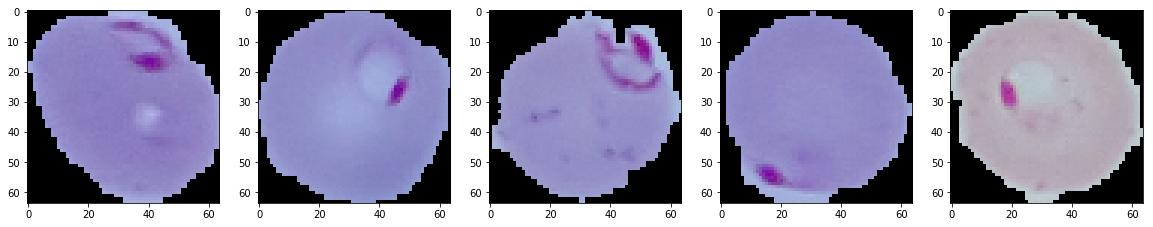

In [5]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

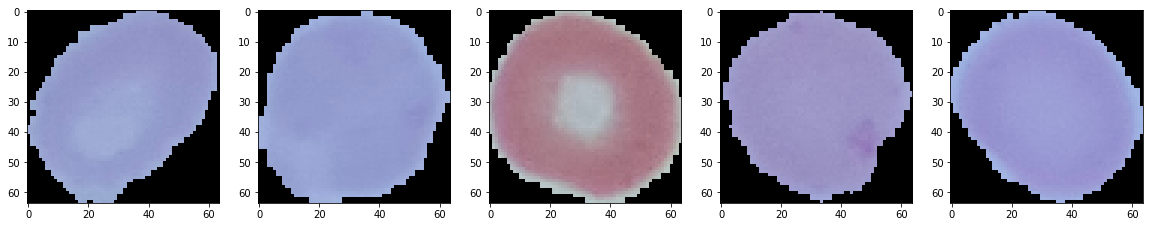

In [6]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

## let's create a model

In [7]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=2))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
__________

## split data into train and test as well as do "one hot encoding"

In [ ]:
from keras.utials import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

## Train the model 

In [9]:
%time history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 50, 
                         validation_split = 0.1,
                         shuffle = False)

Train on 19841 samples, validate on 2205 samples
Epoch 1/50
  256/19841 [..............................] - ETA: 2:23:46 - loss: 0.8966 - acc: 0.5195

/home/denim/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (3.327712). Check your callbacks.
  % delta_t_median)
/home/denim/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (1.664205). Check your callbacks.
  % delta_t_median)


19841/19841 [==============================] - 163s 8ms/step - loss: 0.4269 - acc: 0.8023 - val_loss: 1.0211 - val_acc: 0.7206
Epoch 2/50
19841/19841 [==============================] - 47s 2ms/step - loss: 0.2227 - acc: 0.9164 - val_loss: 0.6403 - val_acc: 0.7864
Epoch 3/50
19841/19841 [==============================] - 48s 2ms/step - loss: 0.1867 - acc: 0.9315 - val_loss: 0.3181 - val_acc: 0.8830
Epoch 4/50
19841/19841 [==============================] - 47s 2ms/step - loss: 0.1689 - acc: 0.9358 - val_loss: 0.2423 - val_acc: 0.9129
Epoch 5/50
19841/19841 [==============================] - 47s 2ms/step - loss: 0.1539 - acc: 0.9404 - val_loss: 0.2162 - val_acc: 0.9261
Epoch 6/50
19841/19841 [==============================] - 48s 2ms/step - loss: 0.1429 - acc: 0.9447 - val_loss: 0.2476 - val_acc: 0.9229
Epoch 7/50
19841/19841 [==============================] - 48s 2ms/step - loss: 0.1326 - acc: 0.9478 - val_loss: 0.2450 - val_acc: 0.9002
Epoch 8/50
19841/19841 [===========================

## Accuracy!

In [10]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(X_test), np.array(y_test))[1]*100))

5512/5512 [==============================] - 5s 944us/step
Test_Accuracy: 95.61%


## Show confusion matrix

[[2573  130]
 [ 112 2697]]


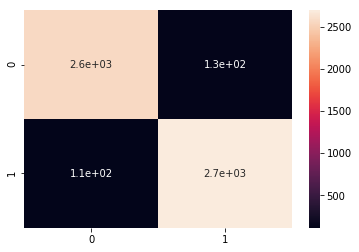

In [41]:
#get the predictions for the test data
predicted_classes = classifier.predict_classes([X_test])
#get the indices to be plotted
y_true = y_test
y_true=np.argmax(y_true, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)

labels = list(range(2))
print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [38]:
len(dataset)

27558